<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/Discrete_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#read a image like oandas read csv

In [ ]:
I = plt.imread('panda.jpg')

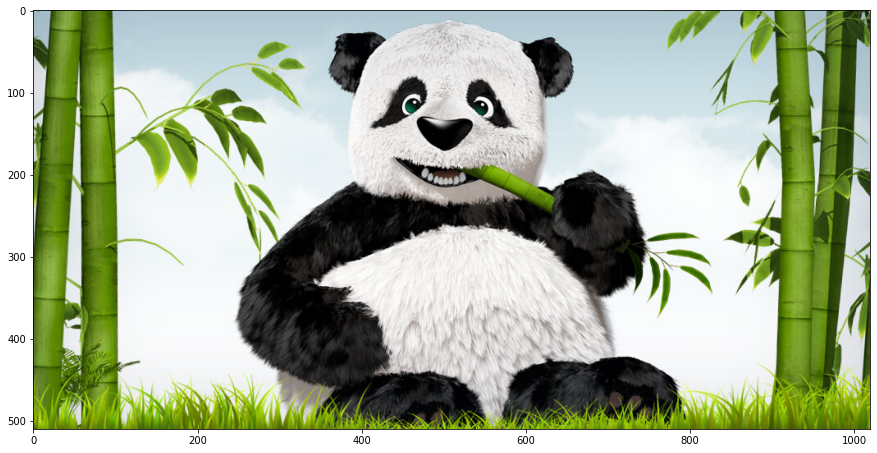

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(I)

In [ ]:
type(I)

numpy.ndarray

In [ ]:
I.shape

(510, 1020, 3)

#make black and white version

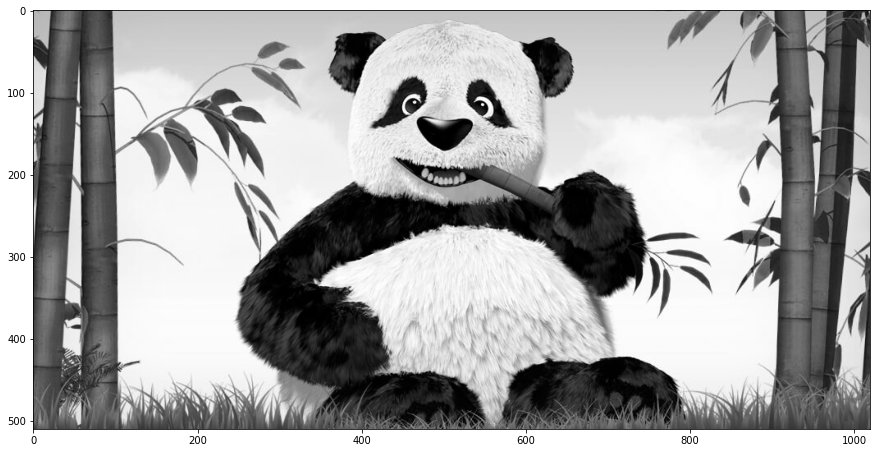

In [ ]:
BW = np.mean(I,axis=2)
plt.figure(figsize=(15,10))
plt.imshow(BW,cmap='gray')

#simple  1.3 can be any number higer than 1
# increasing contrast
# any number below 1 will lower the contrast
# you can square it too

In [ ]:
IContrast = (I*1.3/255)**2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


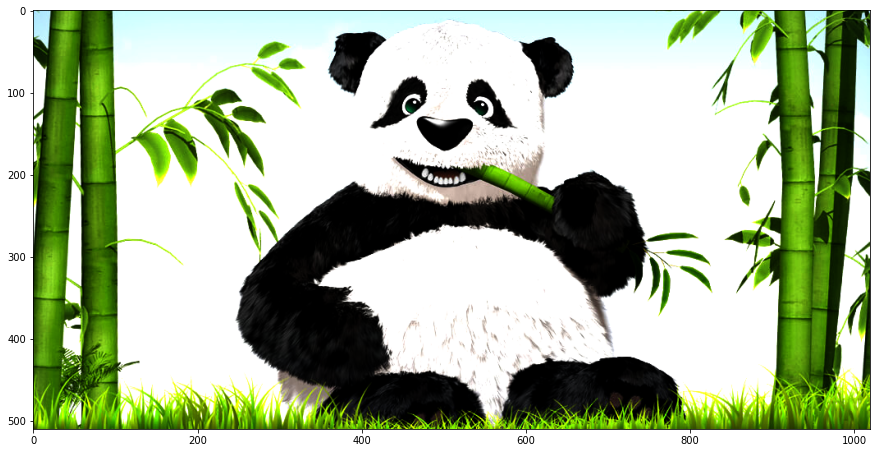

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(IContrast)

(array([220679., 126107.,  67717.,  60184.,  71901.,  67600.,  65390.,
        110578., 249863., 520581.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

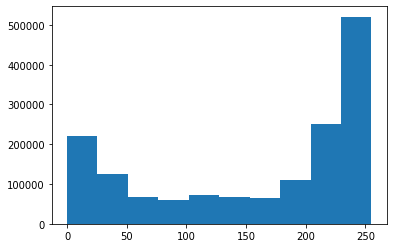

In [ ]:
newI = I.flatten()

plt.hist(newI)

## Discrete convolution

In [ ]:
def discrete2DConv(Image, flter, padding):
    paddedImage = np.pad(Image, padding, 'constant')
    flter = np.rot90(flter, 2)
    conv = np.empty(Image.shape)
    for i in range(paddedImage.shape[0]-flter.shape[0]):
        for j in range(paddedImage.shape[1]-flter.shape[1]):
            
            conv[i,j] = np.sum((paddedImage[i:i+flter.shape[0], j:j+flter.shape[1]])*flter)
    
    return conv

In [ ]:
def discrete2DcrossCorr(Image,flter,padding):
  paddedImage = np.pad(Image, padding, 'constant')
  corr = np.empty(Image.shape)
  for i in range(paddedImage.shape[0]-flter.shape[0]):
        for j in range(paddedImage.shape[1]-flter.shape[1]):
            
            corr[i,j] = np.sum((paddedImage[i:i+flter.shape[0], j:j+flter.shape[1]])*flter)
    
  return corr


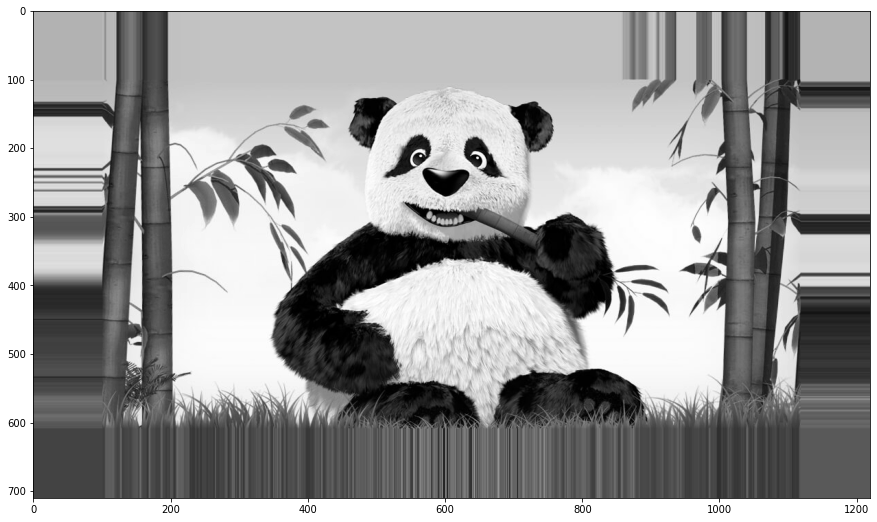

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(np.pad(BW,[100,100],'edge'),cmap='gray')

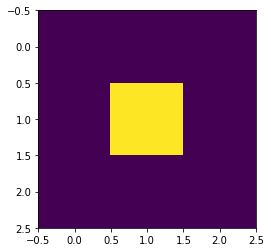

In [ ]:
flter2D = np.array([[0,0,0],[0,1,0],[0,0,0]])
plt.imshow(flter2D)

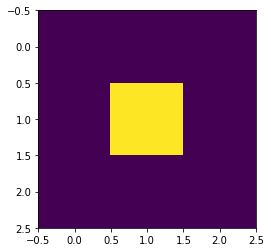

In [ ]:
flterneg = np.array([[-1,-1,-1,],[-1,-1,-1,],[-1,-1,-1]])
plt.imshow(flter2D)

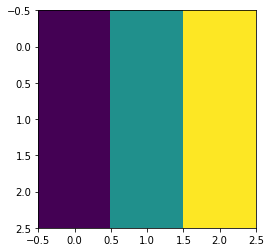

In [ ]:
flter_right_edge = np.array([[-10,0,10],[-10,0,10],[-10,0,10]])
plt.imshow(flter_right_edge)

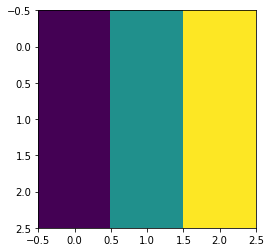

In [ ]:
flter_left_edge = np.array([[10,0,-10],[10,0,-10],[10,0,-10]])
plt.imshow(flter_right_edge)

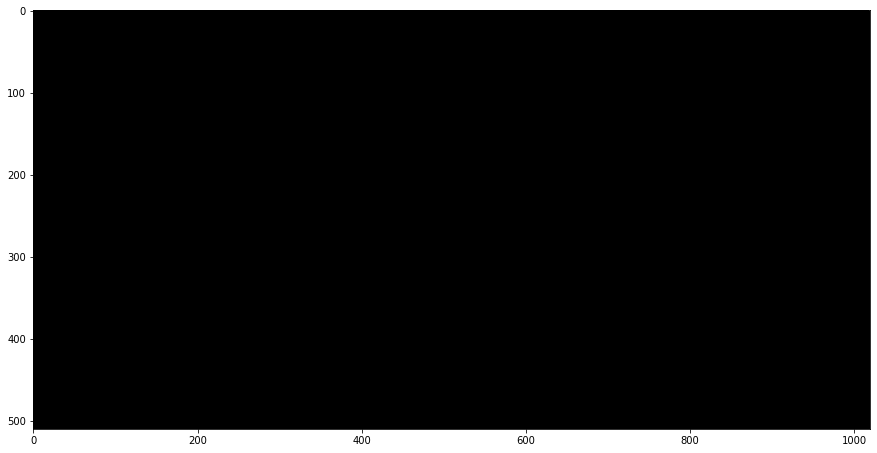

In [ ]:
ImConv=discrete2DConv(BW,flter_left_edge,1)
plt.figure(figsize=(15,10))
plt.imshow(ImConv,cmap='gray')

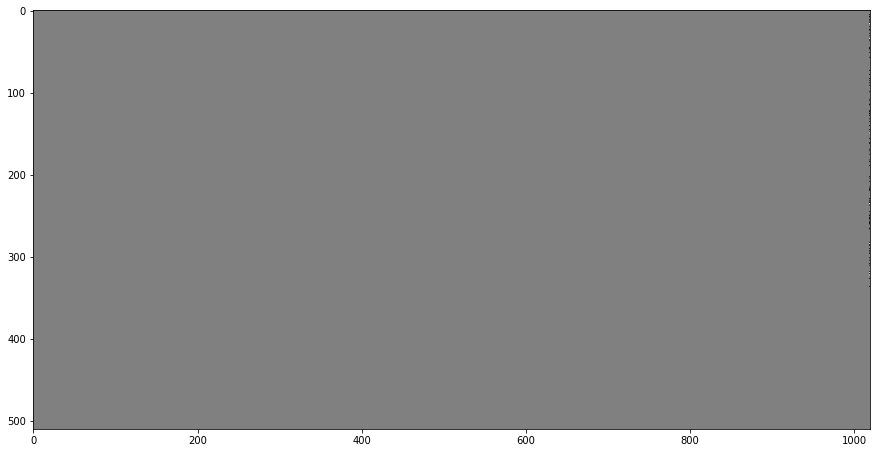

In [ ]:
imagecorr= discrete2DcrossCorr(BW,flter_left_edge,1)
plt.figure(figsize=(15,10))
plt.imshow(imagecorr,cmap='gray')


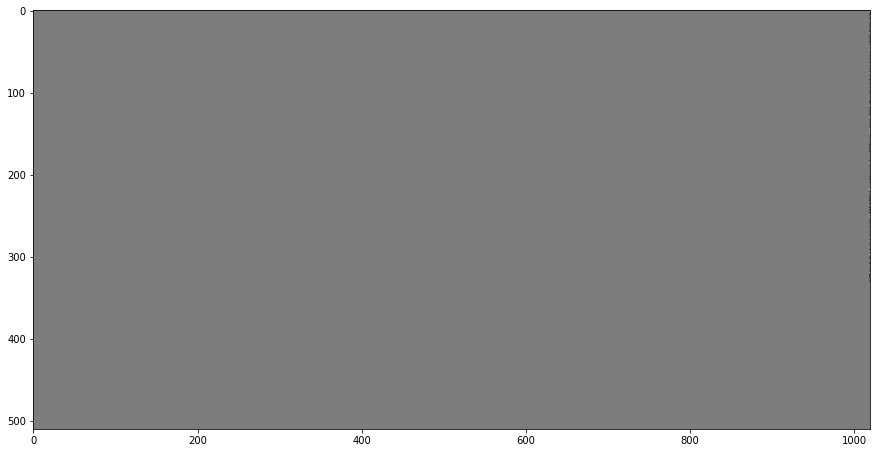

In [ ]:
imagecorr=discrete2DConv(BW,flter_right_edge,1)
plt.figure(figsize=(15,10))
plt.imshow(imagecorr,cmap='gray')


#Pooling

In [ ]:
def MaxPool(Image,Ksize,stride):
  n = 0
  k = 0
  vert = int(Image.shape[1]/stride)
  hoz = int(Image.shape[0]/stride)
  mxPool = np.empty((hoz,vert))
  for i in range(0,Image.shape[0]-stride,stride):
    n=0
    for j in range(0,Image.shape[1]-stride,stride):
      mxPool[k,n] = np.max(Image[i:i+Ksize,j:j+Ksize])
      n+=1
    k+=1
  return mxPool

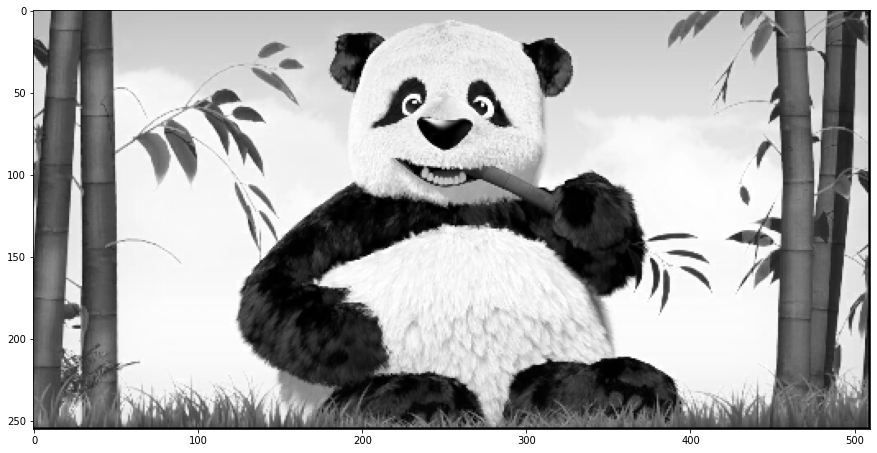

In [ ]:
imPool = MaxPool(BW,2,2)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

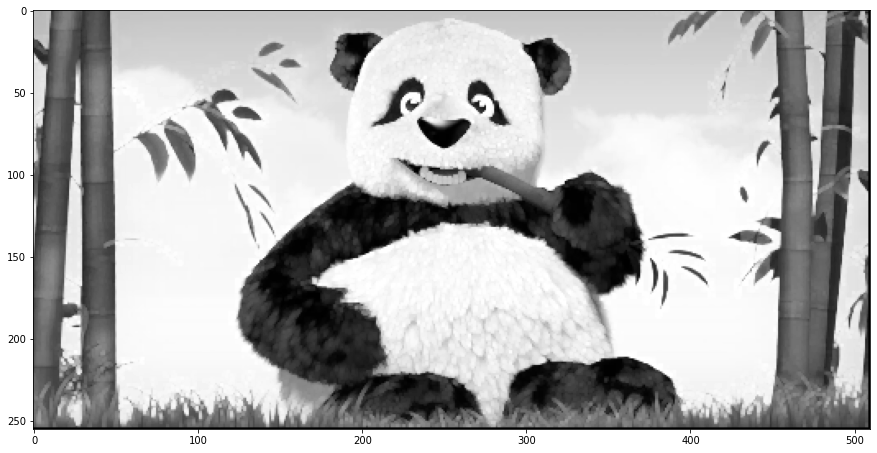

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

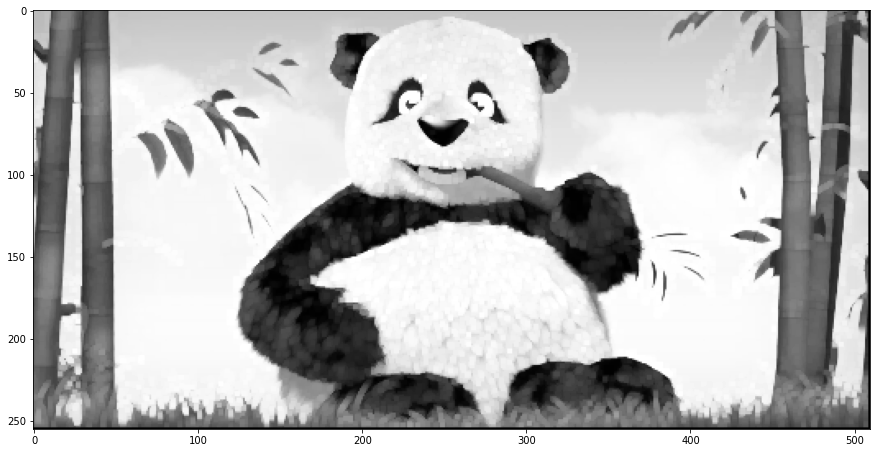

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

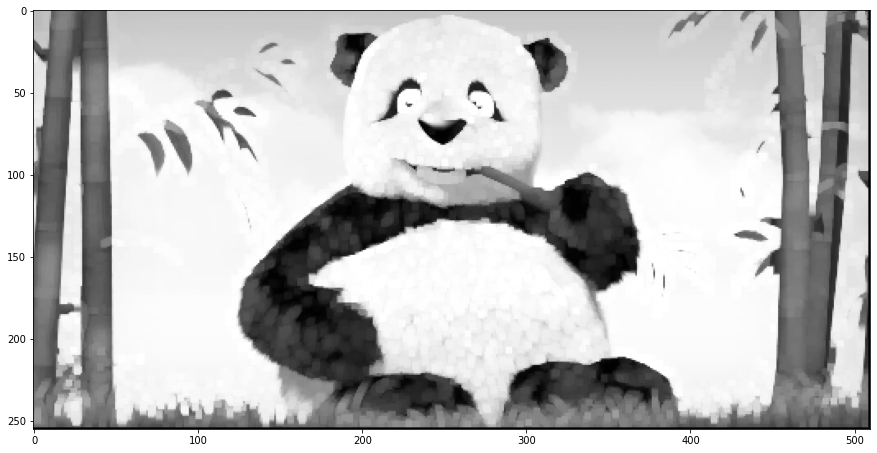

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

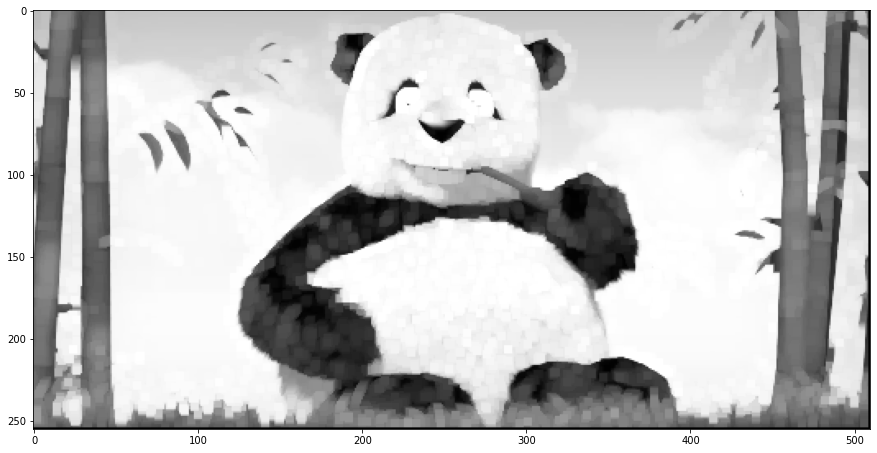

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

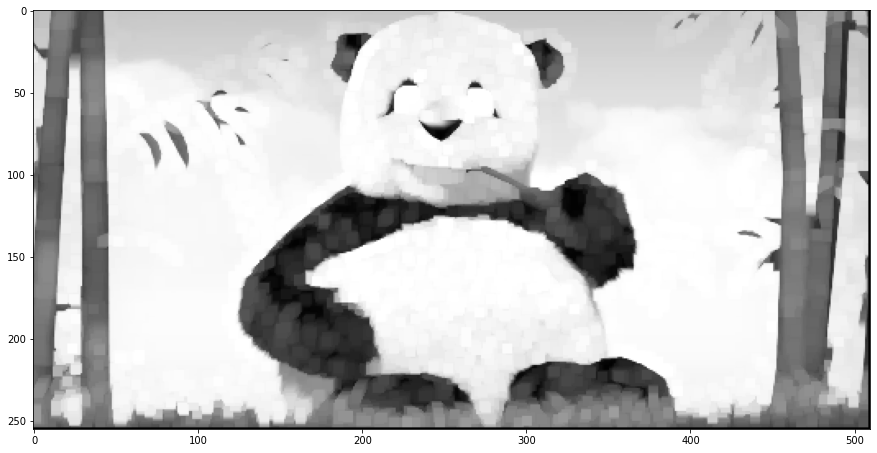

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

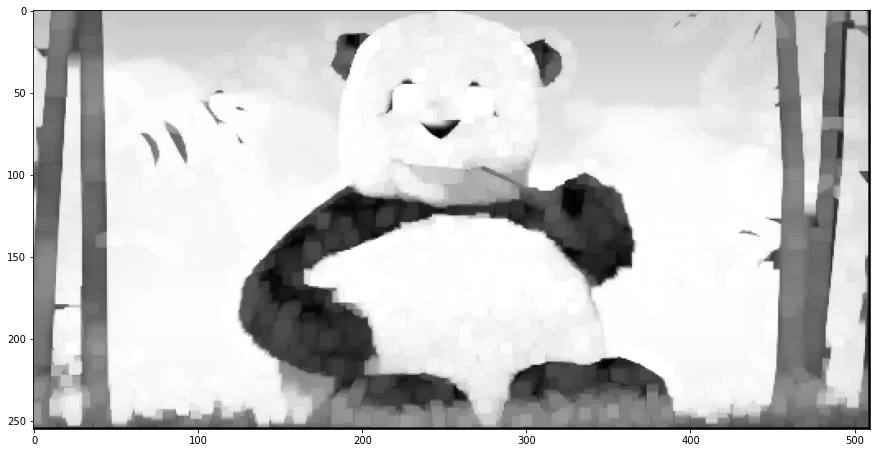

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

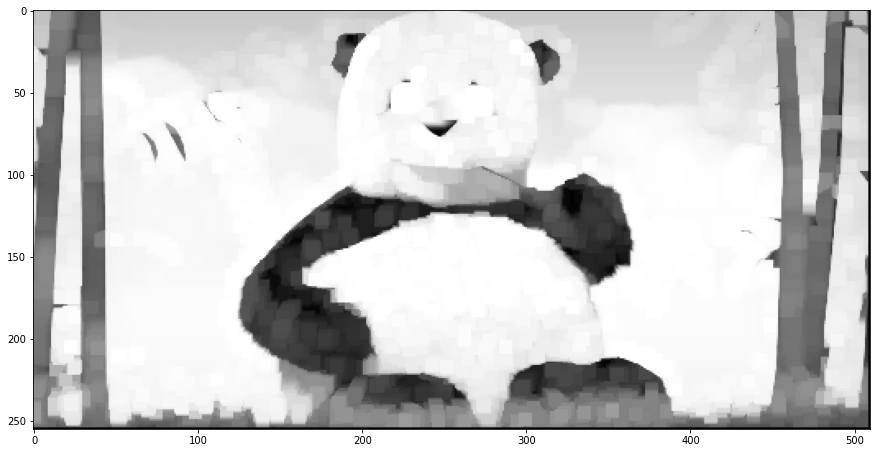

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

In [ ]:
def ImAv(Image,kSize,stride):
    n=0
    k=0
    vert=int(Image.shape[1]/stride)
    hoz=int(Image.shape[0]/stride)
    MxPool=np.empty((hoz,vert))
    for i in range(0,Image.shape[0],stride):
        n=0
        for j in range(0,Image.shape[1],stride):
            #print(i,j)
            #print(n,k)
            MxPool[k,n]=np.mean(Image[i:i+kSize,j:j+kSize])
            n+=1
        k+=1
            
    return MxPool

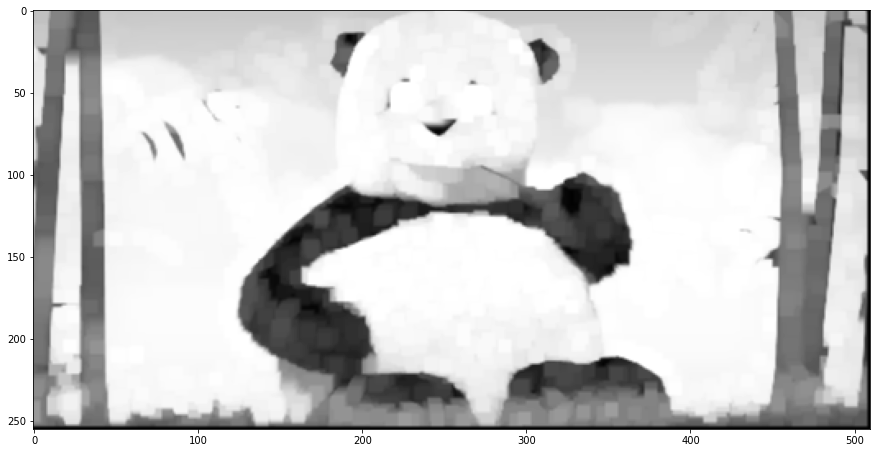

In [ ]:
imPool = ImAv(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

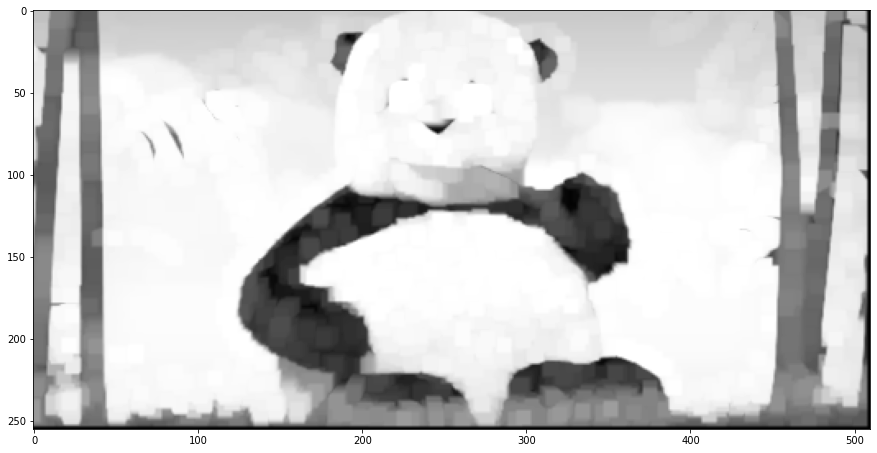

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

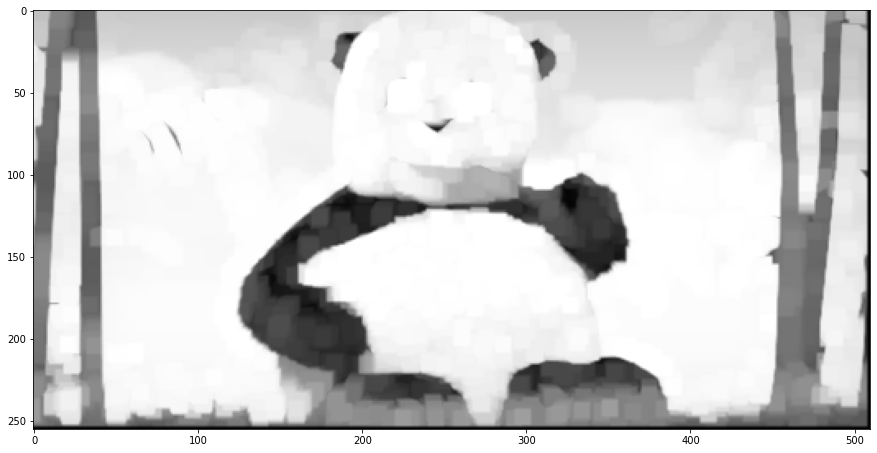

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

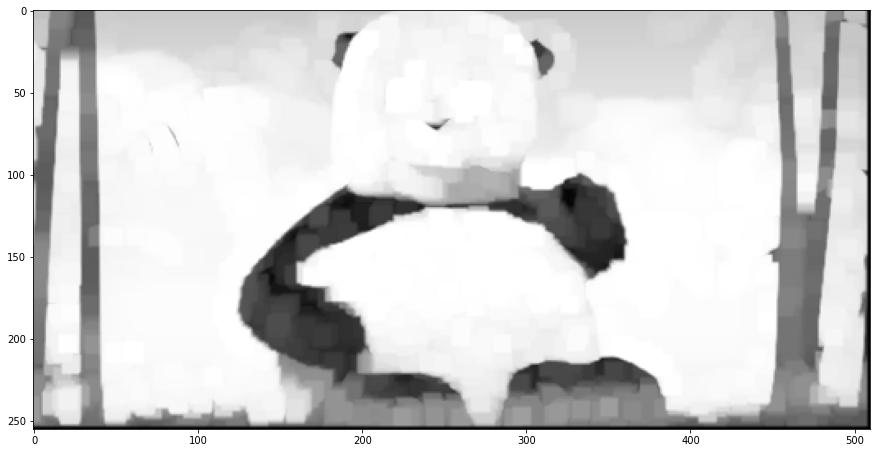

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

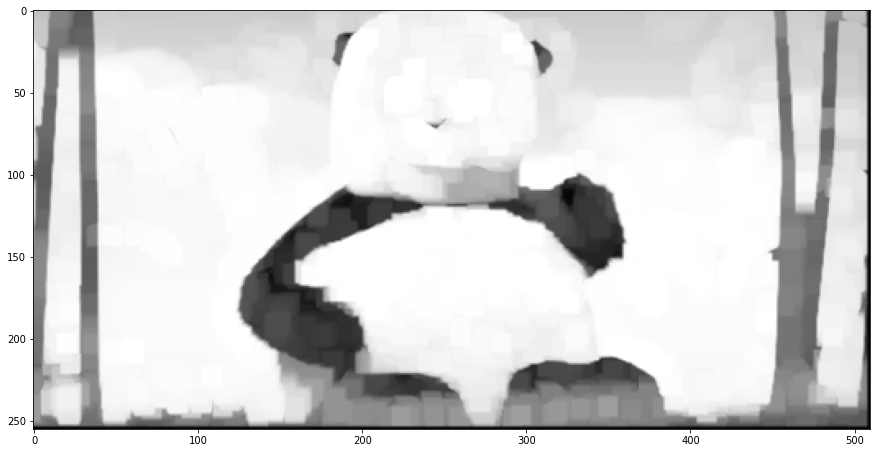

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

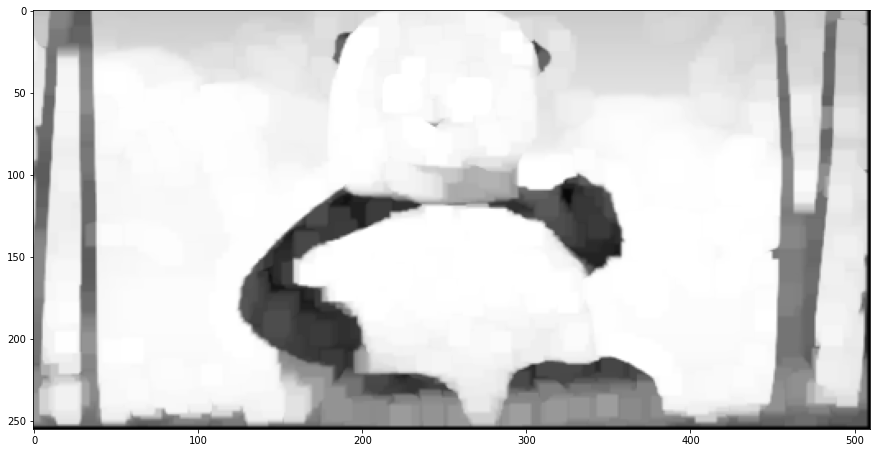

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

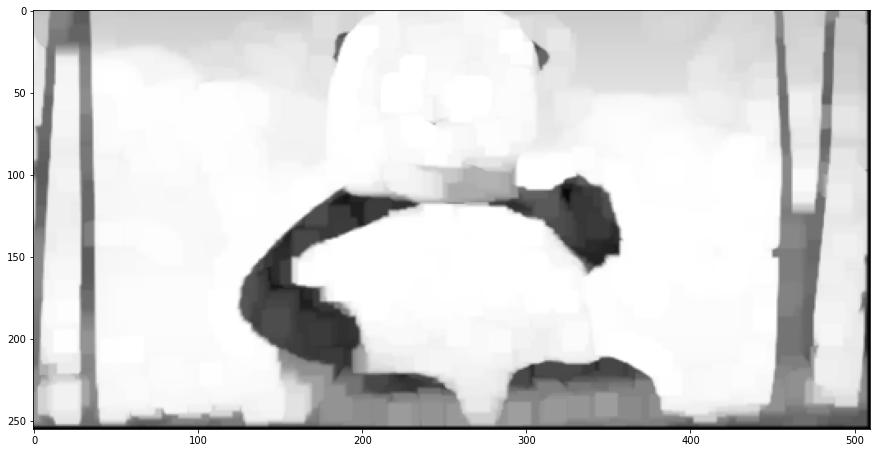

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

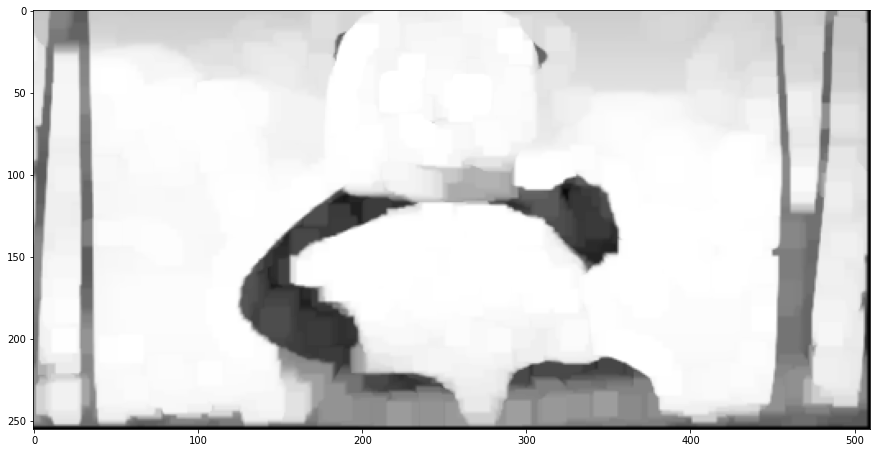

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

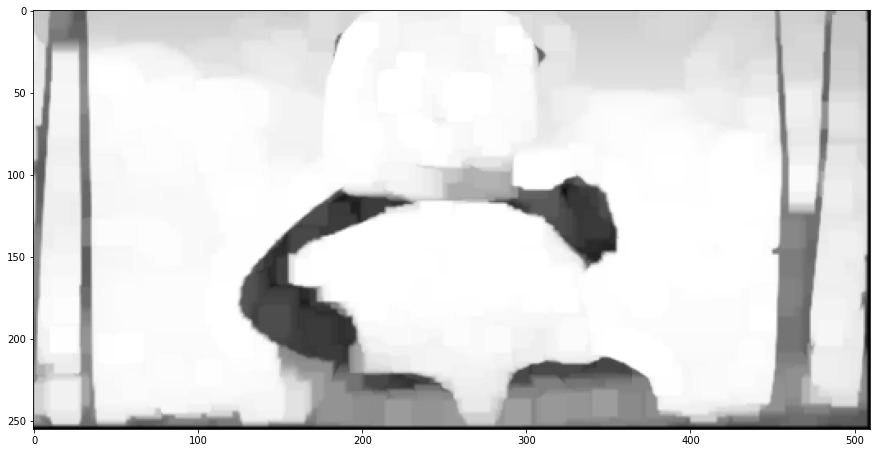

In [ ]:
imPool = MaxPool(imPool,2,1)
plt.figure(figsize=(15,10))
plt.imshow(imPool,cmap='gray')

In [ ]:

imPool

array([[1.95666667e+002, 1.95666667e+002, 1.95666667e+002, ...,
        1.63000000e+002, 6.90000000e+001, 7.29111856e-304],
       [1.99000000e+002, 1.99000000e+002, 1.99000000e+002, ...,
        1.63000000e+002, 6.90000000e+001, 7.29111856e-304],
       [1.99000000e+002, 1.99000000e+002, 1.99000000e+002, ...,
        1.63000000e+002, 6.90000000e+001, 7.29111856e-304],
       ...,
       [1.16000000e+002, 1.16000000e+002, 1.16000000e+002, ...,
        8.83333333e+001, 4.41666667e+001, 7.29111856e-304],
       [5.46666667e+001, 5.46666667e+001, 5.46666667e+001, ...,
        4.41666667e+001, 2.20833333e+001, 7.29111856e-304],
       [7.29111856e-304, 7.29111856e-304, 7.29111856e-304, ...,
        7.29111856e-304, 7.29111856e-304, 7.29111856e-304]])